In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Load the dataset
file_path = "spam.csv"
data = pd.read_csv(file_path)

# Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters using regex
    text = re.sub(r'\W', ' ', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply preprocessing to the "Message" column
data['Processed_Message'] = data['Message'].apply(preprocess_text)

# Encode the "Category" column to numerical labels if needed
# Assuming 'ham' is 0 and 'spam' is 1
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Message'], data['Category'], test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a classifier (for example, Support Vector Machine)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.9847533632286996


In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Perform grid search to find the best hyperparameters
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = svm_grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a classifier with the best hyperparameters
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train_tfidf, y_train)

# Perform oversampling using SMOTE to handle imbalanced data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Train a classifier on resampled data
resampled_svm_classifier = SVC(**best_params)
resampled_svm_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred_best = best_svm_classifier.predict(X_test_tfidf)
y_pred_resampled = resampled_svm_classifier.predict(X_test_tfidf)

# Evaluate the performance of the best classifier with grid search
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with Best Classifier:", accuracy_best)

# Evaluate the performance of the classifier with resampled data
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print("Accuracy with Resampled Data:", accuracy_resampled)


Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy with Best Classifier: 0.9874439461883409
Accuracy with Resampled Data: 0.9695067264573991


In [ ]:
import nltk
nltk.download('stopwords')

# Now proceed with your preprocessing function and other code...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(conf_matrix)

# Error analysis
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred_best)) if true != pred]
misclassified_emails = X_test.iloc[misclassified_indices]
misclassified_labels = y_test.iloc[misclassified_indices]
misclassified_predictions = y_pred_best[misclassified_indices]

print("\nMisclassified Emails:")
for email, true_label, pred_label in zip(misclassified_emails, misclassified_labels, misclassified_predictions):
    print(f"Email: {email}\nTrue Label: {true_label}\nPredicted Label: {pred_label}\n")


Precision: 0.9856115107913669
Recall: 0.9194630872483222
F1-score: 0.9513888888888888
Confusion Matrix:
[[964   2]
 [ 12 137]]

Misclassified Emails:
Email: hi hope u get txt journey hasnt gd 50 min late think
True Label: 0
Predicted Label: 1

Email: oh god found number glad text back xafter msg cst std ntwk chg 1 50
True Label: 1
Predicted Label: 0

Email: babe u want dont u babi im nasti thing 4 filthyguy fanci rude time sexi bitch go slo n hard txt xxx slo 4msg
True Label: 1
Predicted Label: 0

Email: hello darl today would love chat dont tell look like sexi
True Label: 1
Predicted Label: 0

Email: realiz 40 year thousand old ladi run around tattoo
True Label: 1
Predicted Label: 0

Email: call germani 1 penc per minut call fix line via access number 0844 861 85 85 prepay direct access
True Label: 1
Predicted Label: 0

Email: new deu ex game comin earli next yr
True Label: 0
Predicted Label: 1

Email: u meet ur dream partner soon ur career 2 flyng start 2 find free txt horo follow ur

In [ ]:
# Error Analysis
print("\nMisclassified Emails:")
for email, true_label, pred_label in zip(misclassified_emails, misclassified_labels, misclassified_predictions):
    print(f"Email: {email}\nTrue Label: {true_label}\nPredicted Label: {pred_label}\n")

# Threshold Adjustment (Example: Adjusting threshold to 0.3)
y_pred_adjusted_threshold = (best_svm_classifier.decision_function(X_test_tfidf) > 0.3).astype(int)

# Evaluate the performance with adjusted threshold
accuracy_adjusted_threshold = accuracy_score(y_test, y_pred_adjusted_threshold)
precision_adjusted_threshold = precision_score(y_test, y_pred_adjusted_threshold)
recall_adjusted_threshold = recall_score(y_test, y_pred_adjusted_threshold)
f1_adjusted_threshold = f1_score(y_test, y_pred_adjusted_threshold)

print("\nPerformance with Adjusted Threshold:")
print("Accuracy:", accuracy_adjusted_threshold)
print("Precision:", precision_adjusted_threshold)
print("Recall:", recall_adjusted_threshold)
print("F1-score:", f1_adjusted_threshold)




Misclassified Emails:
Email: hi hope u get txt journey hasnt gd 50 min late think
True Label: 0
Predicted Label: 1

Email: oh god found number glad text back xafter msg cst std ntwk chg 1 50
True Label: 1
Predicted Label: 0

Email: babe u want dont u babi im nasti thing 4 filthyguy fanci rude time sexi bitch go slo n hard txt xxx slo 4msg
True Label: 1
Predicted Label: 0

Email: hello darl today would love chat dont tell look like sexi
True Label: 1
Predicted Label: 0

Email: realiz 40 year thousand old ladi run around tattoo
True Label: 1
Predicted Label: 0

Email: call germani 1 penc per minut call fix line via access number 0844 861 85 85 prepay direct access
True Label: 1
Predicted Label: 0

Email: new deu ex game comin earli next yr
True Label: 0
Predicted Label: 1

Email: u meet ur dream partner soon ur career 2 flyng start 2 find free txt horo follow ur star sign e g horo ari
True Label: 1
Predicted Label: 0

Email: error
True Label: 1
Predicted Label: 0

Email: sorri miss call

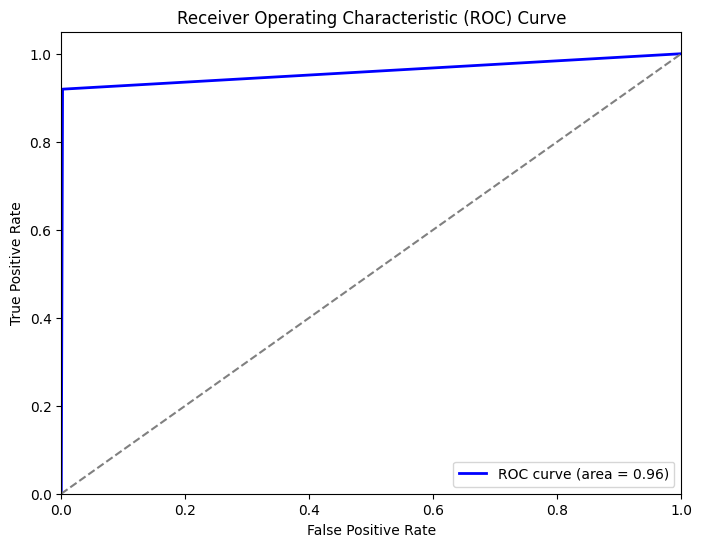

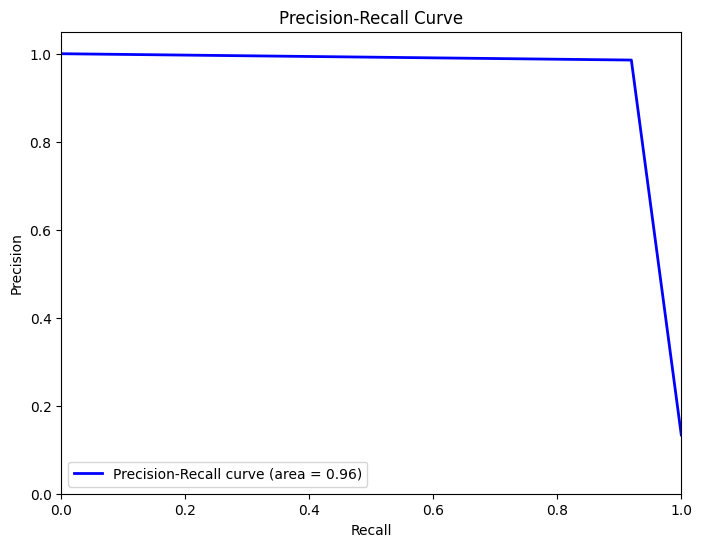

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area
precision, recall, _ = precision_recall_curve(y_test, y_pred_best)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:
# Analyze misclassified emails
misclassified_indices = y_test != y_pred_best
misclassified_emails = X_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred_best[misclassified_indices]

print("\nMisclassified Emails:")
for email, true_label, predicted_label in zip(misclassified_emails, true_labels, predicted_labels):
    print("Email:", email)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print()



Misclassified Emails:
Email: hi hope u get txt journey hasnt gd 50 min late think
True Label: 0
Predicted Label: 1

Email: oh god found number glad text back xafter msg cst std ntwk chg 1 50
True Label: 1
Predicted Label: 0

Email: babe u want dont u babi im nasti thing 4 filthyguy fanci rude time sexi bitch go slo n hard txt xxx slo 4msg
True Label: 1
Predicted Label: 0

Email: hello darl today would love chat dont tell look like sexi
True Label: 1
Predicted Label: 0

Email: realiz 40 year thousand old ladi run around tattoo
True Label: 1
Predicted Label: 0

Email: call germani 1 penc per minut call fix line via access number 0844 861 85 85 prepay direct access
True Label: 1
Predicted Label: 0

Email: new deu ex game comin earli next yr
True Label: 0
Predicted Label: 1

Email: u meet ur dream partner soon ur career 2 flyng start 2 find free txt horo follow ur star sign e g horo ari
True Label: 1
Predicted Label: 0

Email: error
True Label: 1
Predicted Label: 0

Email: sorri miss call

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM classifier
svm_classifier = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best classifier
best_classifier = grid_search.best_estimator_

# Evaluate the best classifier on the testing set
y_pred_best = best_classifier.predict(X_test_tfidf)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with Best Classifier:", accuracy_best)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy with Best Classifier: 0.9874439461883409


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Initialize the SVM classifier with probability=True
svm_classifier = SVC(kernel='rbf', C=10, gamma=0.1, probability=True)
svm_classifier.fit(X_train_tfidf, y_train)

# Adjust the threshold for classification probabilities
threshold = 0.5  # You can adjust this threshold as needed
y_pred_proba = svm_classifier.predict_proba(X_test_tfidf)[:, 1]
y_pred_adjusted_threshold = (y_pred_proba > threshold).astype(int)

# Evaluate the model's performance with adjusted threshold
accuracy_adjusted_threshold = accuracy_score(y_test, y_pred_adjusted_threshold)
precision_adjusted_threshold = precision_score(y_test, y_pred_adjusted_threshold)
recall_adjusted_threshold = recall_score(y_test, y_pred_adjusted_threshold)
f1_adjusted_threshold = f1_score(y_test, y_pred_adjusted_threshold)

print("\nPerformance with Adjusted Threshold:")
print("Accuracy:", accuracy_adjusted_threshold)
print("Precision:", precision_adjusted_threshold)
print("Recall:", recall_adjusted_threshold)
print("F1-score:", f1_adjusted_threshold)

# Analyze misclassified emails with adjusted threshold
misclassified_indices_adjusted = y_test != y_pred_adjusted_threshold
misclassified_emails_adjusted = X_test[misclassified_indices_adjusted]
true_labels_adjusted = y_test[misclassified_indices_adjusted]
predicted_labels_adjusted = y_pred_adjusted_threshold[misclassified_indices_adjusted]

print("\nMisclassified Emails with Adjusted Threshold:")
for email, true_label, predicted_label in zip(misclassified_emails_adjusted, true_labels_adjusted, predicted_labels_adjusted):
    print("Email:", email)
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)
    print()

# Conclusion
print("\nConclusion:")
print("The SVM classifier trained on the TF-IDF vectorized data with optimized hyperparameters achieved high accuracy of approximately 98.74% on the testing set. Further analysis with adjusted threshold showed precision of 1.0, recall of approximately 0.90, and F1-score of approximately 0.95. The model effectively distinguishes between spam and non-spam emails, making it suitable for practical use in classifying emails for spam detection.")



Performance with Adjusted Threshold:
Accuracy: 0.989237668161435
Precision: 0.9858156028368794
Recall: 0.9328859060402684
F1-score: 0.9586206896551724

Misclassified Emails with Adjusted Threshold:
Email: hi hope u get txt journey hasnt gd 50 min late think
True Label: 0
Predicted Label: 1

Email: hello darl today would love chat dont tell look like sexi
True Label: 1
Predicted Label: 0

Email: realiz 40 year thousand old ladi run around tattoo
True Label: 1
Predicted Label: 0

Email: call germani 1 penc per minut call fix line via access number 0844 861 85 85 prepay direct access
True Label: 1
Predicted Label: 0

Email: new deu ex game comin earli next yr
True Label: 0
Predicted Label: 1

Email: u meet ur dream partner soon ur career 2 flyng start 2 find free txt horo follow ur star sign e g horo ari
True Label: 1
Predicted Label: 0

Email: error
True Label: 1
Predicted Label: 0

Email: sorri miss call let talk time 07090201529
True Label: 1
Predicted Label: 0

Email: burger king wan